# Introduction

* Has Life expectancy Increased over time in the six nations?
* Has GDP increased over time in the six nations?
* Is there a correlation between GDP and life expectancy of a country?
* What is the average life expectancy in these nations?


In [23]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv("all_data.csv")

df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [14]:
df.shape

(96, 4)

In [15]:
#Unique Countries in Data.

print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [16]:
#Unique Years in Data.
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [19]:
#Column Name Cleanup
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


<Figure size 800x600 with 0 Axes>

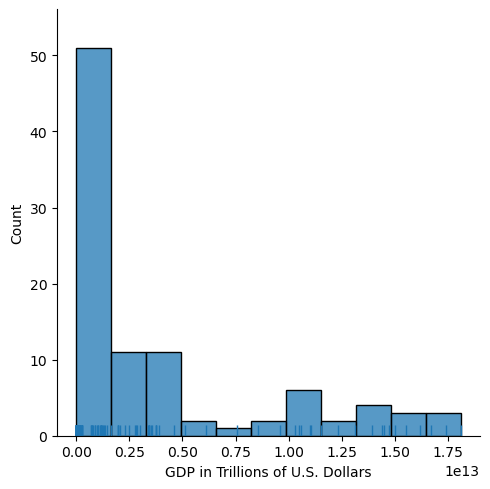

In [25]:
plt.figure(figsize = (8, 6))
sns.displot(df.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars");

Text(0.5, 9.444444444444438, 'Life Expecatancy at Birth in Years')

<Figure size 800x600 with 0 Axes>

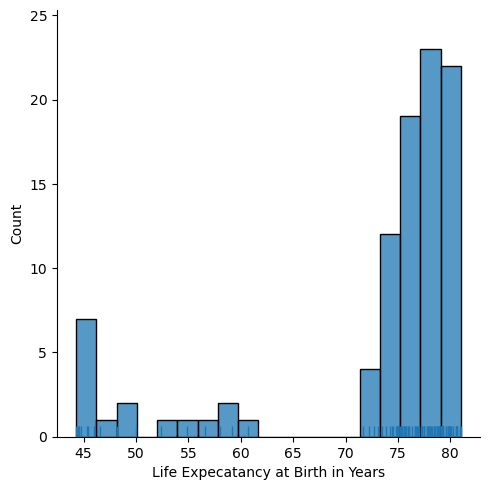

In [26]:
plt.figure(figsize = (8,6))
sns.displot(df.LEABY, rug = True, kde =False)
plt.xlabel("Life Expecatancy at Birth in Years")

In [28]:
dfmeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dfmeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


# Life Expectancy at Birth in years per Country Bar Plot

Text(0.5, 0, 'Life Expectancy at birth in years')

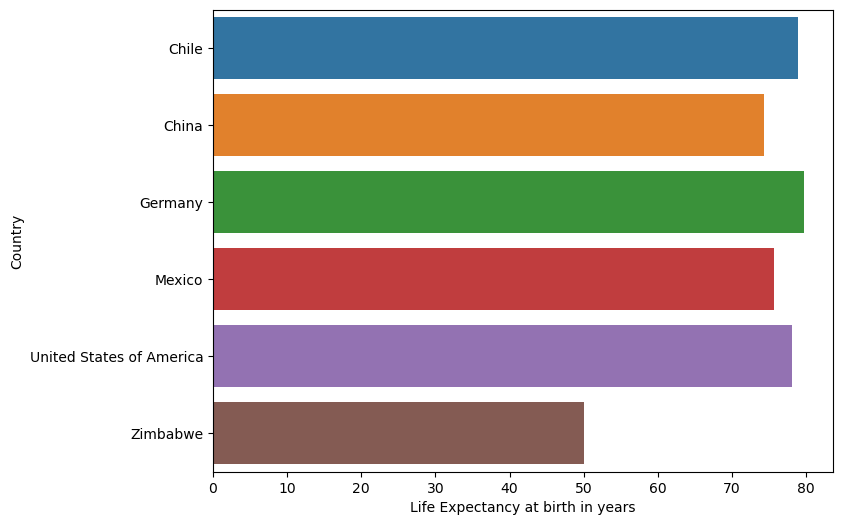

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='LEABY', y='Country', data = dfmeans)
plt.xlabel("Life Expectancy at birth in years")

# GDP in Trillions of U.S. Dollars per Country Bar Plot

Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

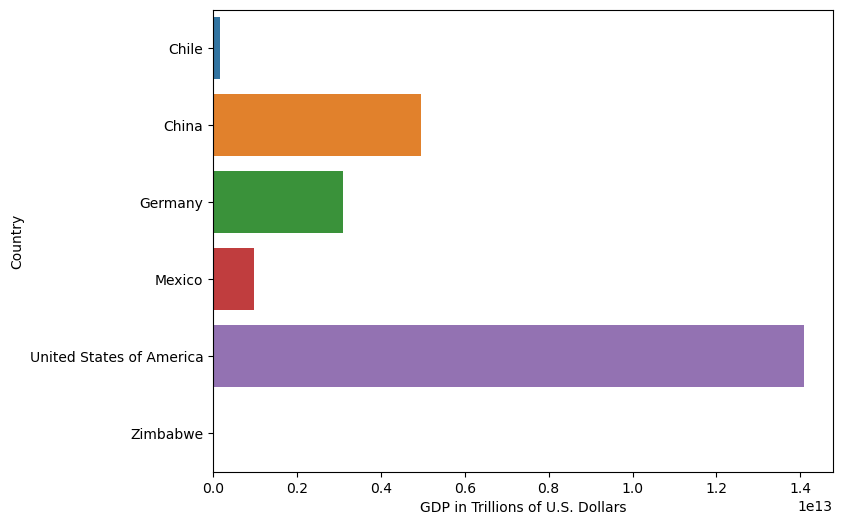

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x='GDP', y = 'Country', data = dfmeans)
plt.xlabel("GDP in Trillions of U.S. Dollars")

# GDP in Trillions of U.S. Dollars per Country in One Line Chart

Text(0, 0.5, 'GDP in Trillions of U.S Dollars')

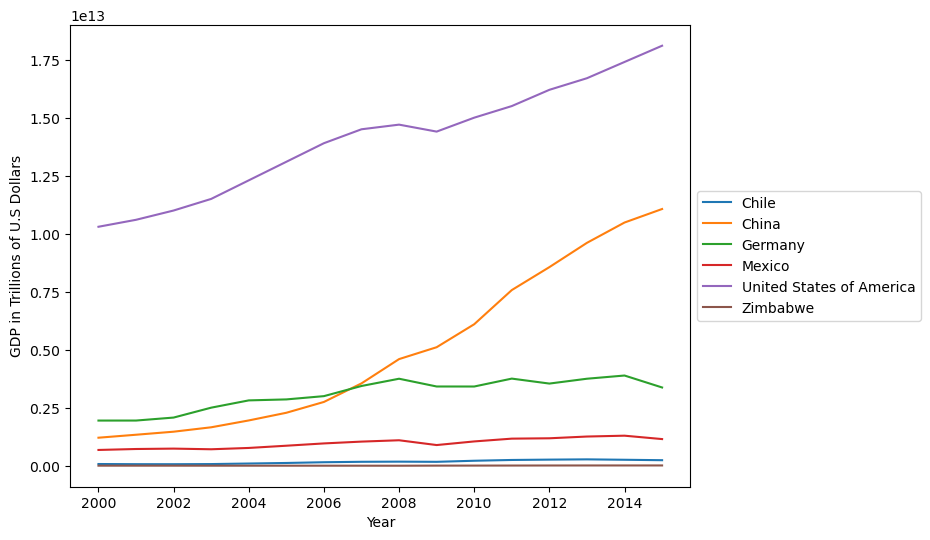

In [31]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S Dollars")

## GDP in Trillions of U.S. Dollars per Country in Multiple Line Charts

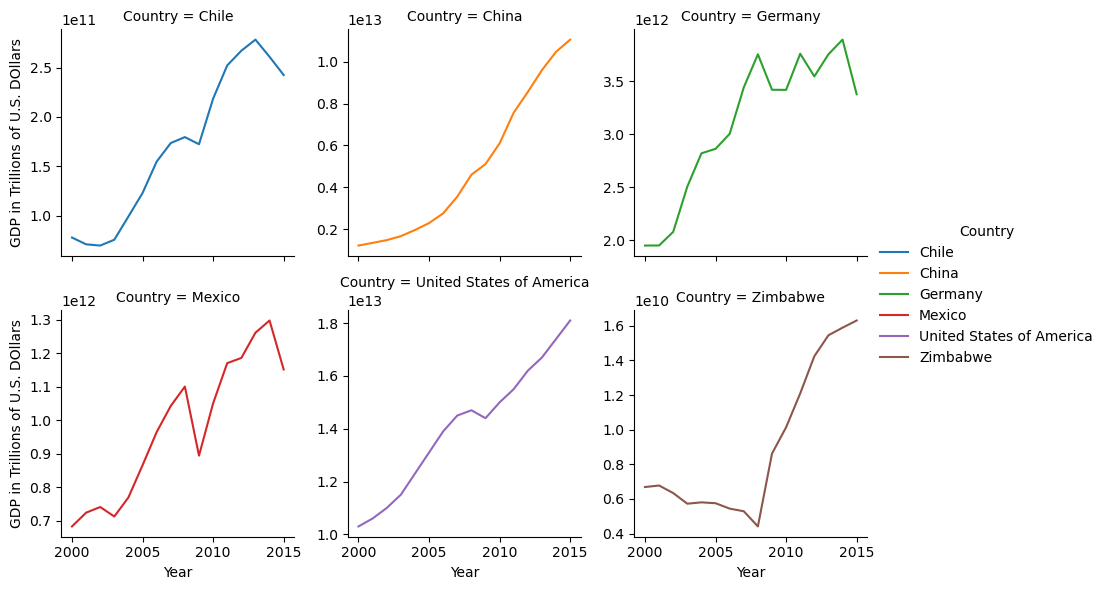

In [34]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue= "Country", sharey=False)

graphGDP = (graphGDP.map(sns.lineplot, "Year", 'GDP').add_legend().set_axis_labels("Year", 'GDP in Trillions of U.S. DOllars'))

# Life Expectancy at Birth in Years in one Scatter Plot

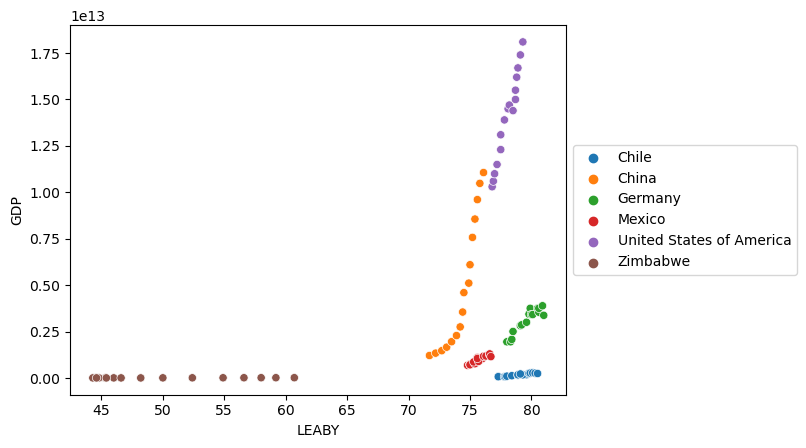

In [37]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

# Life Expectancy at Birth in Years in Multiple Scatter Plot

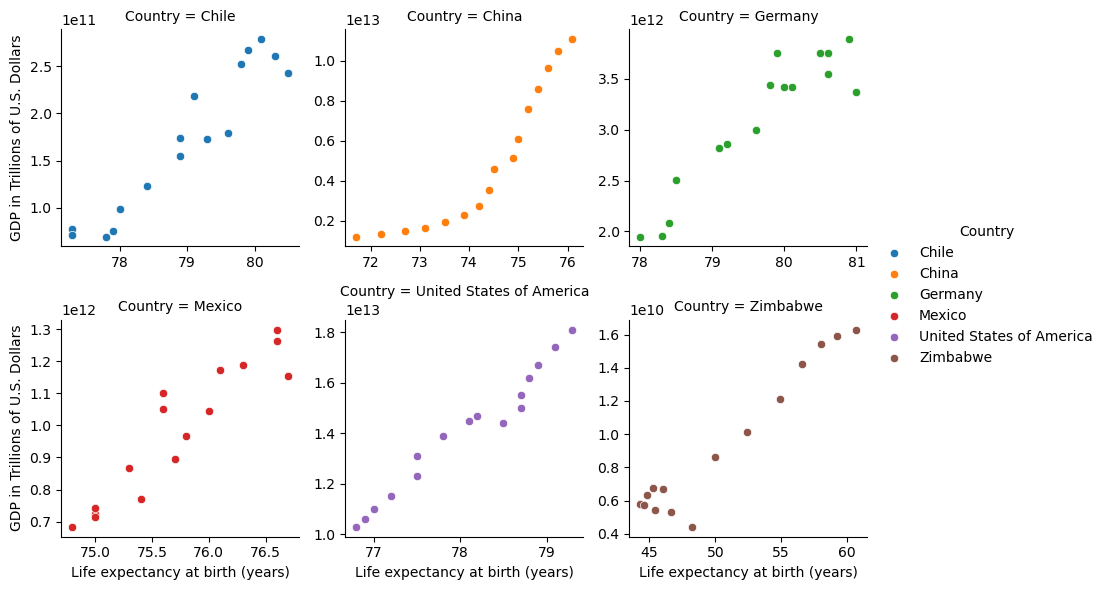

In [39]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));


# Conclusions

This Project has answered the question we posed in the bgenning of the project:

    * Has life expectancy increased over time in the six nations?
        * Yes with Zimbabwe having the greatest increase.
    * Has GDP increased over time in the six nations?
        * GDP has also increased for all countries in our list.
    * Is there a correlation between GDP and life expectancy of a country?
        * Yes the correlation between GDP and life expectancy is a positive correlation.
    * What is the average life expectancy in nations?
        * The average life expectancy in most countries was mid to high 70s except for Zimbabwe which was 50.